This notebook performs data summarization using `eco_validate`

## Input section

In this section basic parameters can be set to for summary, the subsequent cells can be run in bulk.

### Variables to set

- config
  - The path to the Ecotyper config yaml file used for the experiments to summarize (if the same was used). The project folder can be specified as `{parent}`, the scripts folder within the parent can be specified as `{scripts}` if the config is not within either of these, and absolute path is required.
- directories
  - The directories of EcoTyper results to summarize. These need to be either absolute paths or located within the `results` directory specified below.
- outdir 
  - The directory to save the outputs in
- directories_are_absolute
  - If set to *True* the directories will be interpreted as absolute paths and not be set relative to `results`. Otherwise respective directories will be extracted from `results` using `glob`.

In [1]:
config = None
directories = [ "drop_hepato*50", "drop_hepato*30" ]
outdir = "{parent}/summaries"

directories_are_absolute = False

Other project directories (need not necessarily be edited)

In [2]:
# the parent directory of the EcoTyper project
parent = "/data/users/noahkleinschmidt/EcoTyper"

# script and results directories within the parent
scripts = f"{parent}/scripts"
results = f"{parent}/results"
outdir = outdir.format( parent = parent )

if config:
    config = config.format( parent = parent, scripts = scripts )

Now import necessary packages

In [3]:
import os, glob
import eco_validate as ev
from eco_validate import summarize as esum
import matplotlib.pyplot as plt

Get the directories to summarize and make sure the output directory exists

In [4]:
if not directories_are_absolute: 
    dirs = []
    for directory in directories:
        dirs += glob.glob( os.path.join( results, directory ) )
    directories = [ i for i in dirs if os.path.isdir( i ) ]
    del dirs

if not os.path.exists( outdir ):
    os.makedirs( outdir )

Load the config file if any was provided

In [5]:
if config:
    config = ev.EcoTyperConfig( config )

## Summary section

This is the containing the data summary.

### Ranks summary

The *ranks* summarize the initial cell state assignments for each cell type.

In [6]:
# Find the rank datafiles from multiple runs.
rank_datafiles = esum.find_rank_datafiles( directories )

# Combine the ranks assignment for the different cell types from multiple runs.
combined_ranks = esum.combine_ranks( rank_datafiles )

outfile = os.path.join( outdir, "combined_ranks.tsv" )
combined_ranks.to_csv( outfile, sep = "\t" )

Visualize the rank summary as a heatmap

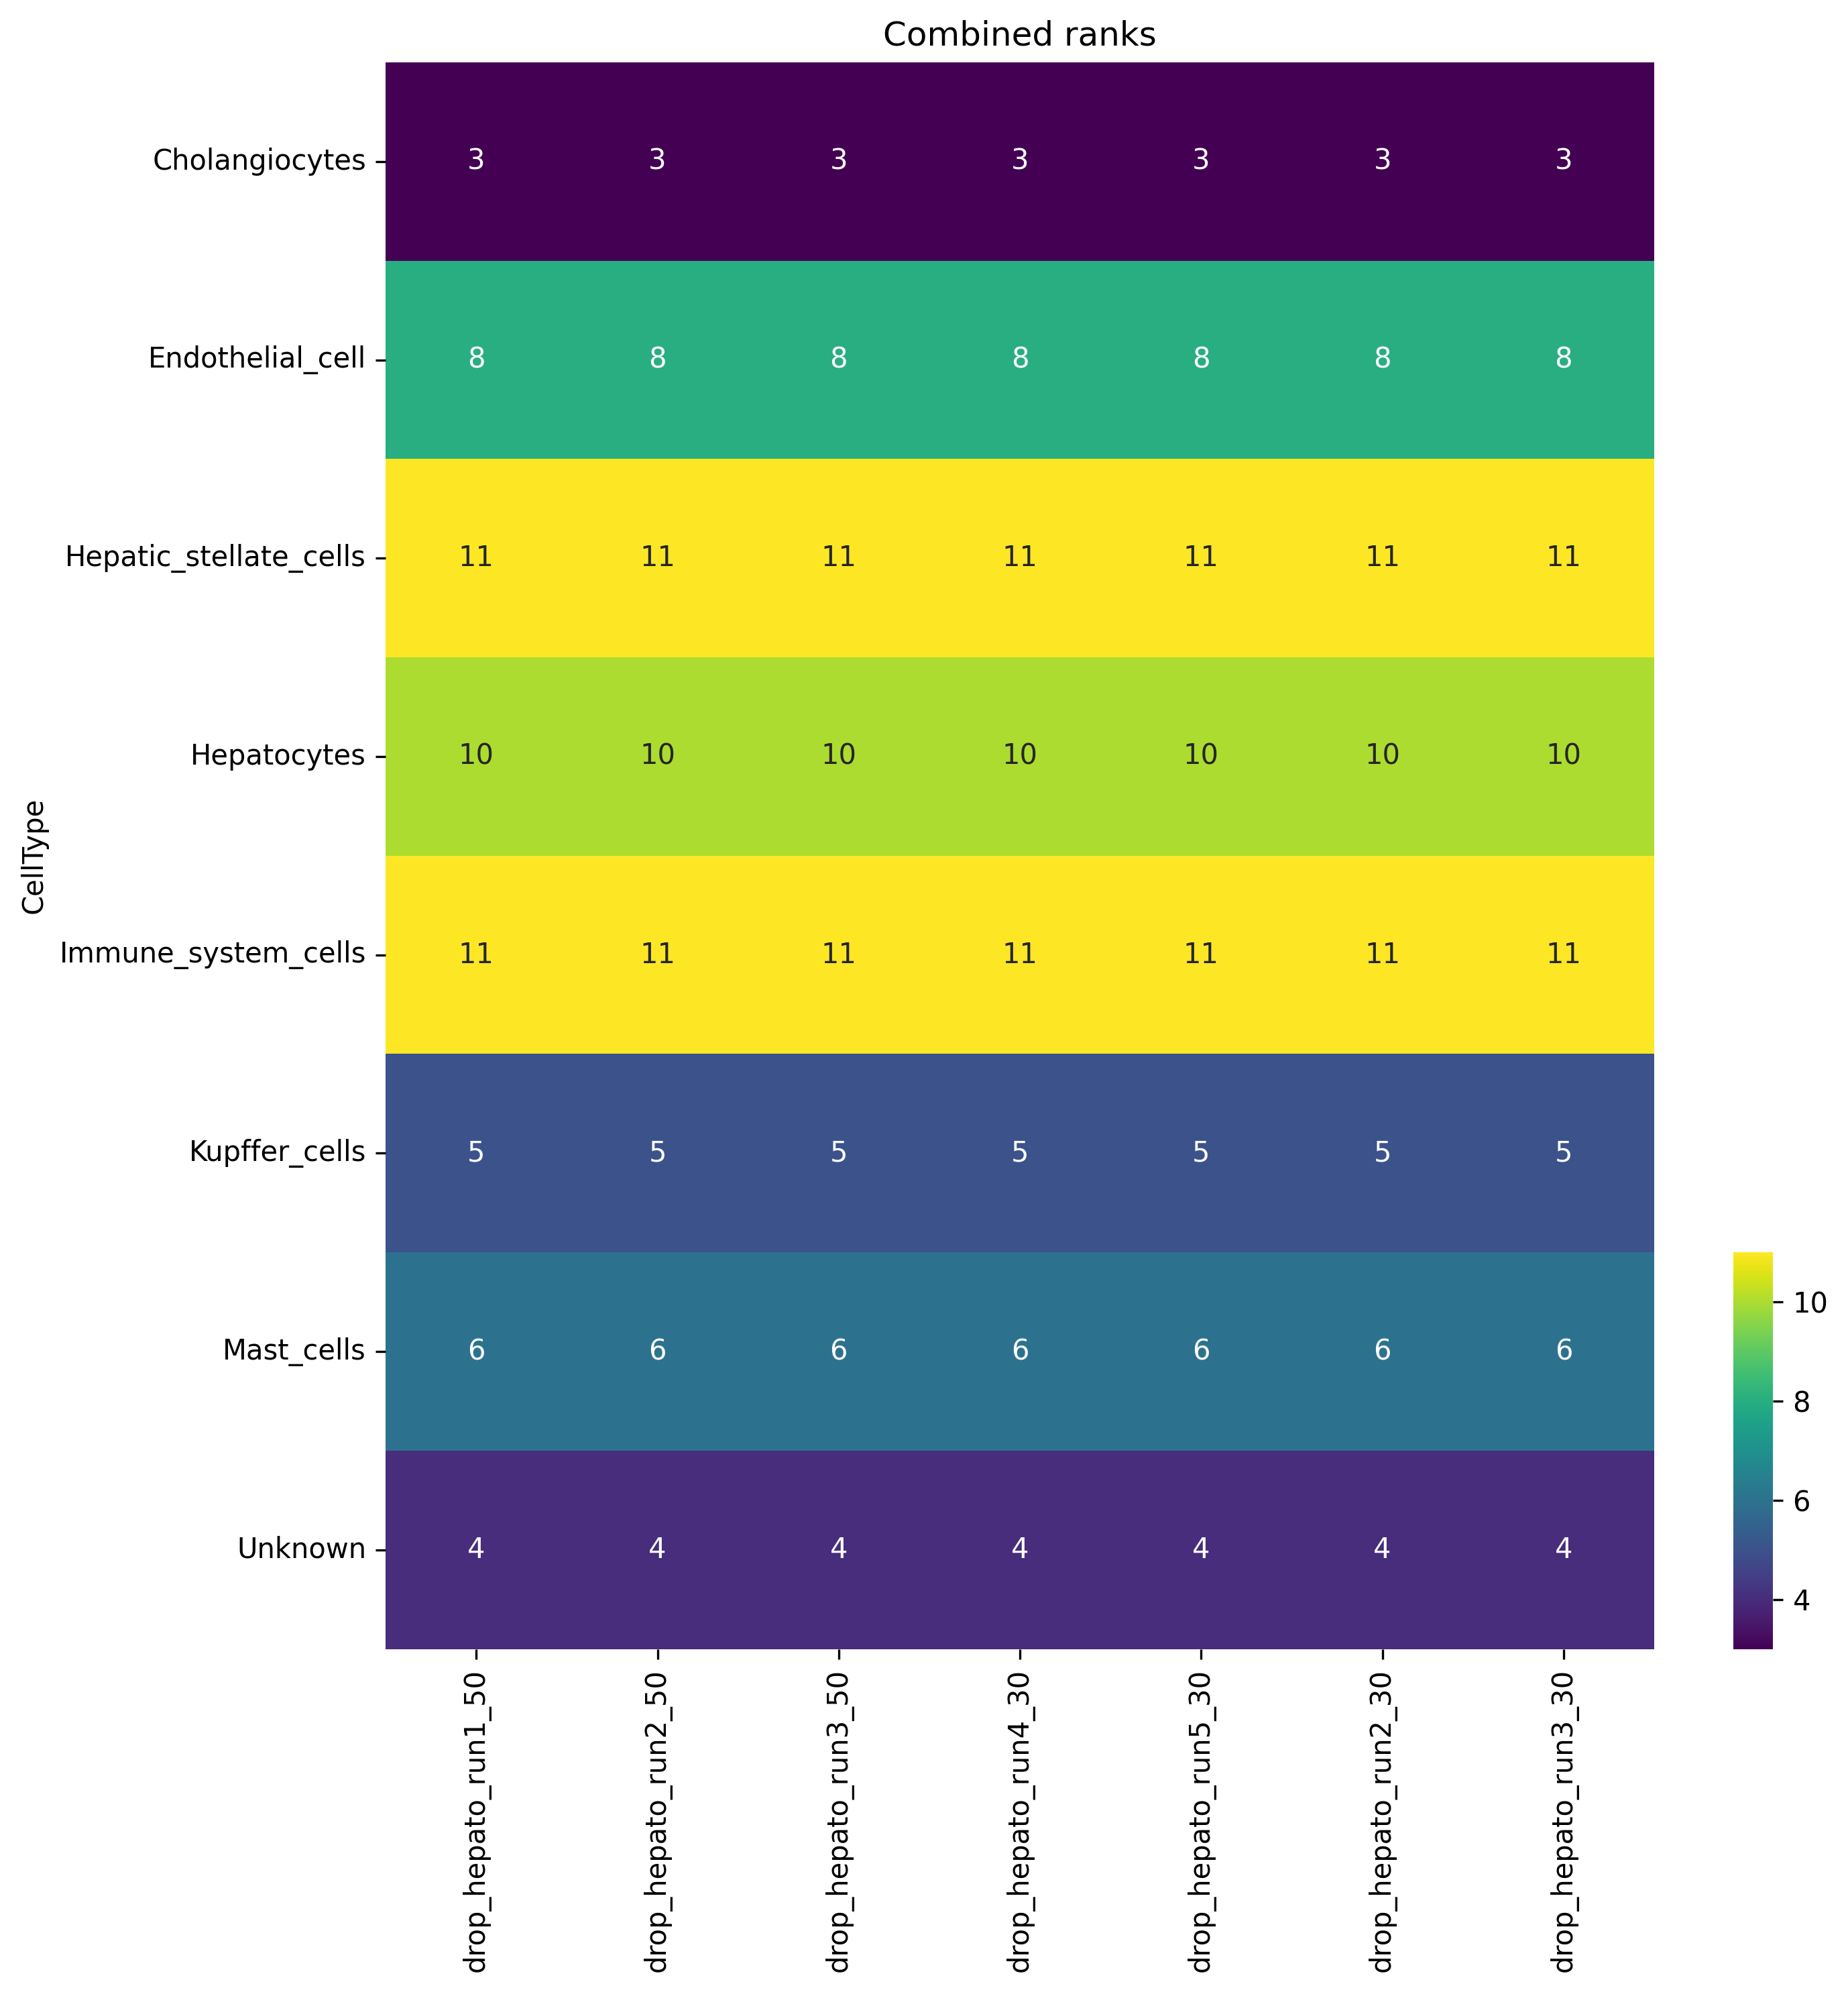

In [7]:
title = "Combined ranks"
if config:
    title += f" (Cophentic cutoff: {config.cophentic_cutoff})"
esum.rank_heatmap( combined_ranks, title = title )

### Cell State Summary

The final *cell state* assignments for each cell type.



In [8]:
# get the collective cell states
states = ev.core.CellStateCollection( directories )
states.save( outdir )

Visualize the cell state assignments as a heatmap for each cell type

Generating heatmap |████████████████████████████████████████| 8/8 [100%] in 6.3s (1.27/s) 


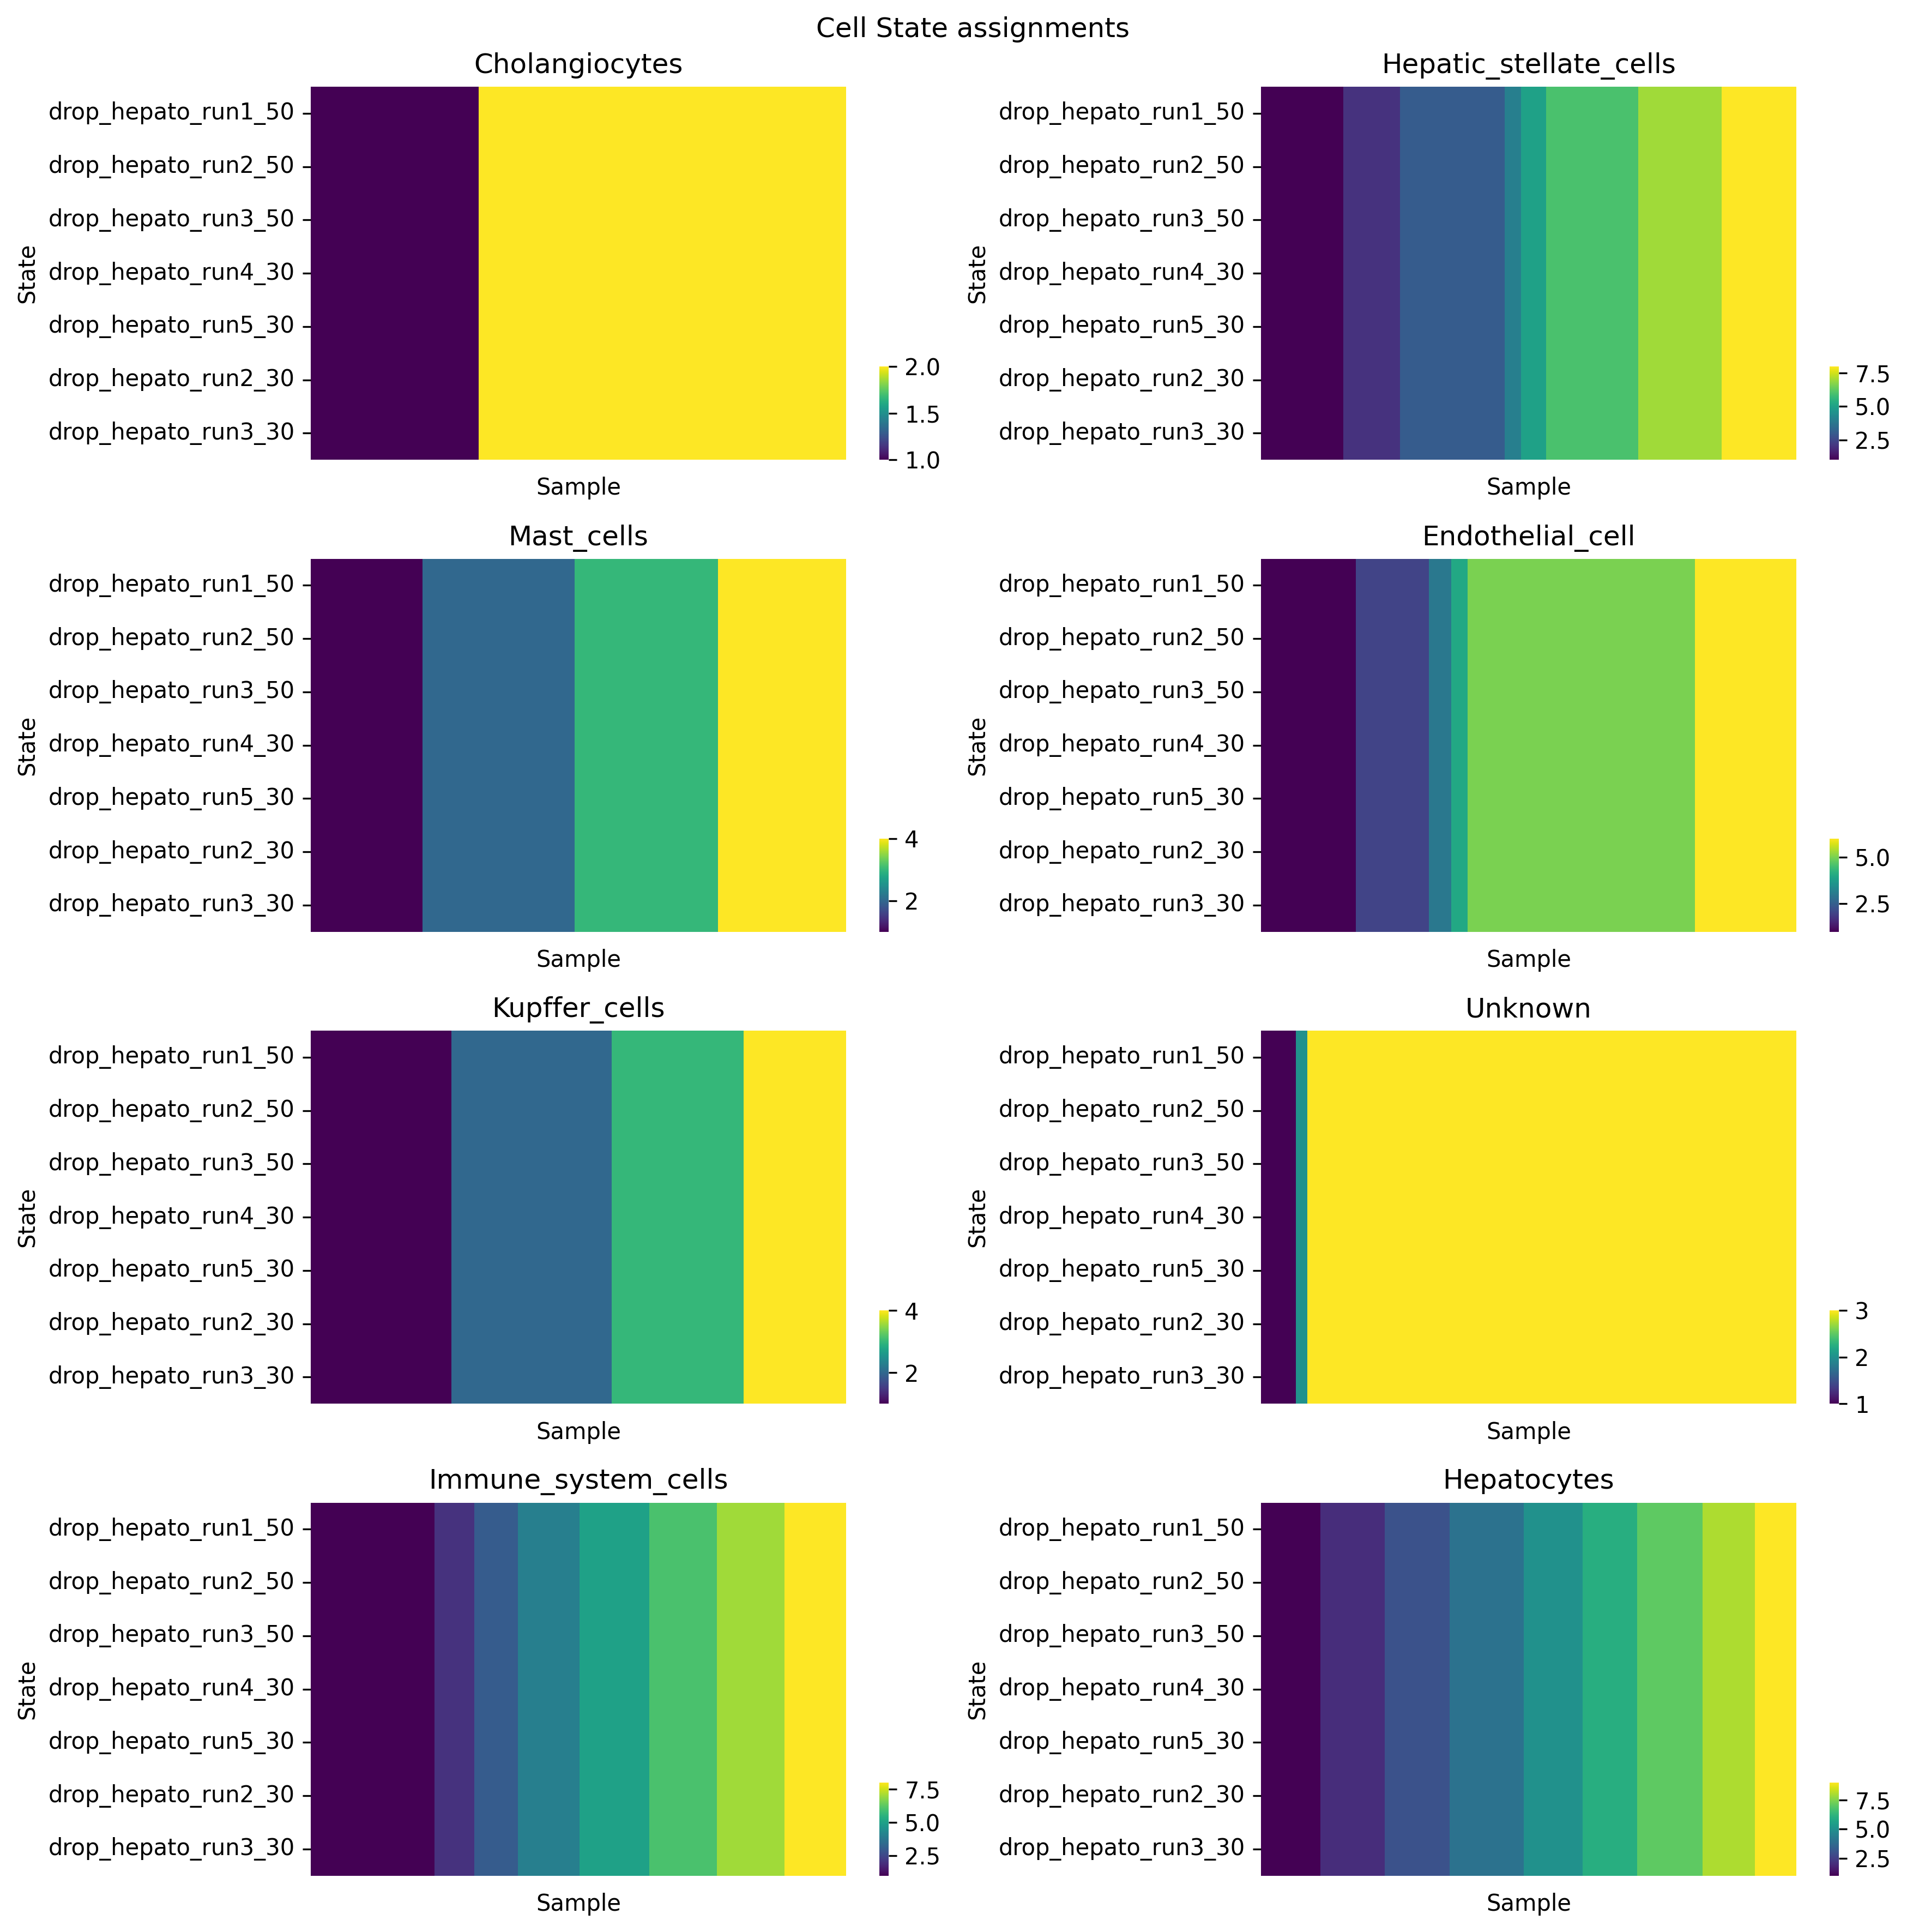

In [13]:
suptitle = "Cell State assignments"
if config:
    suptitle = config.dataset

figsize = ( 12, 12 )

filename = None
# filename = f"{parent}/state_assignments.pdf"

esum.cell_state_heatmap( states, suptitle = suptitle, figsize = figsize, filename = filename )

And visualize the summary also as scatterplots

Generating scatterplot |████████████████████████████████████████| 8/8 [100%] in 12.8s (0.63/s) 


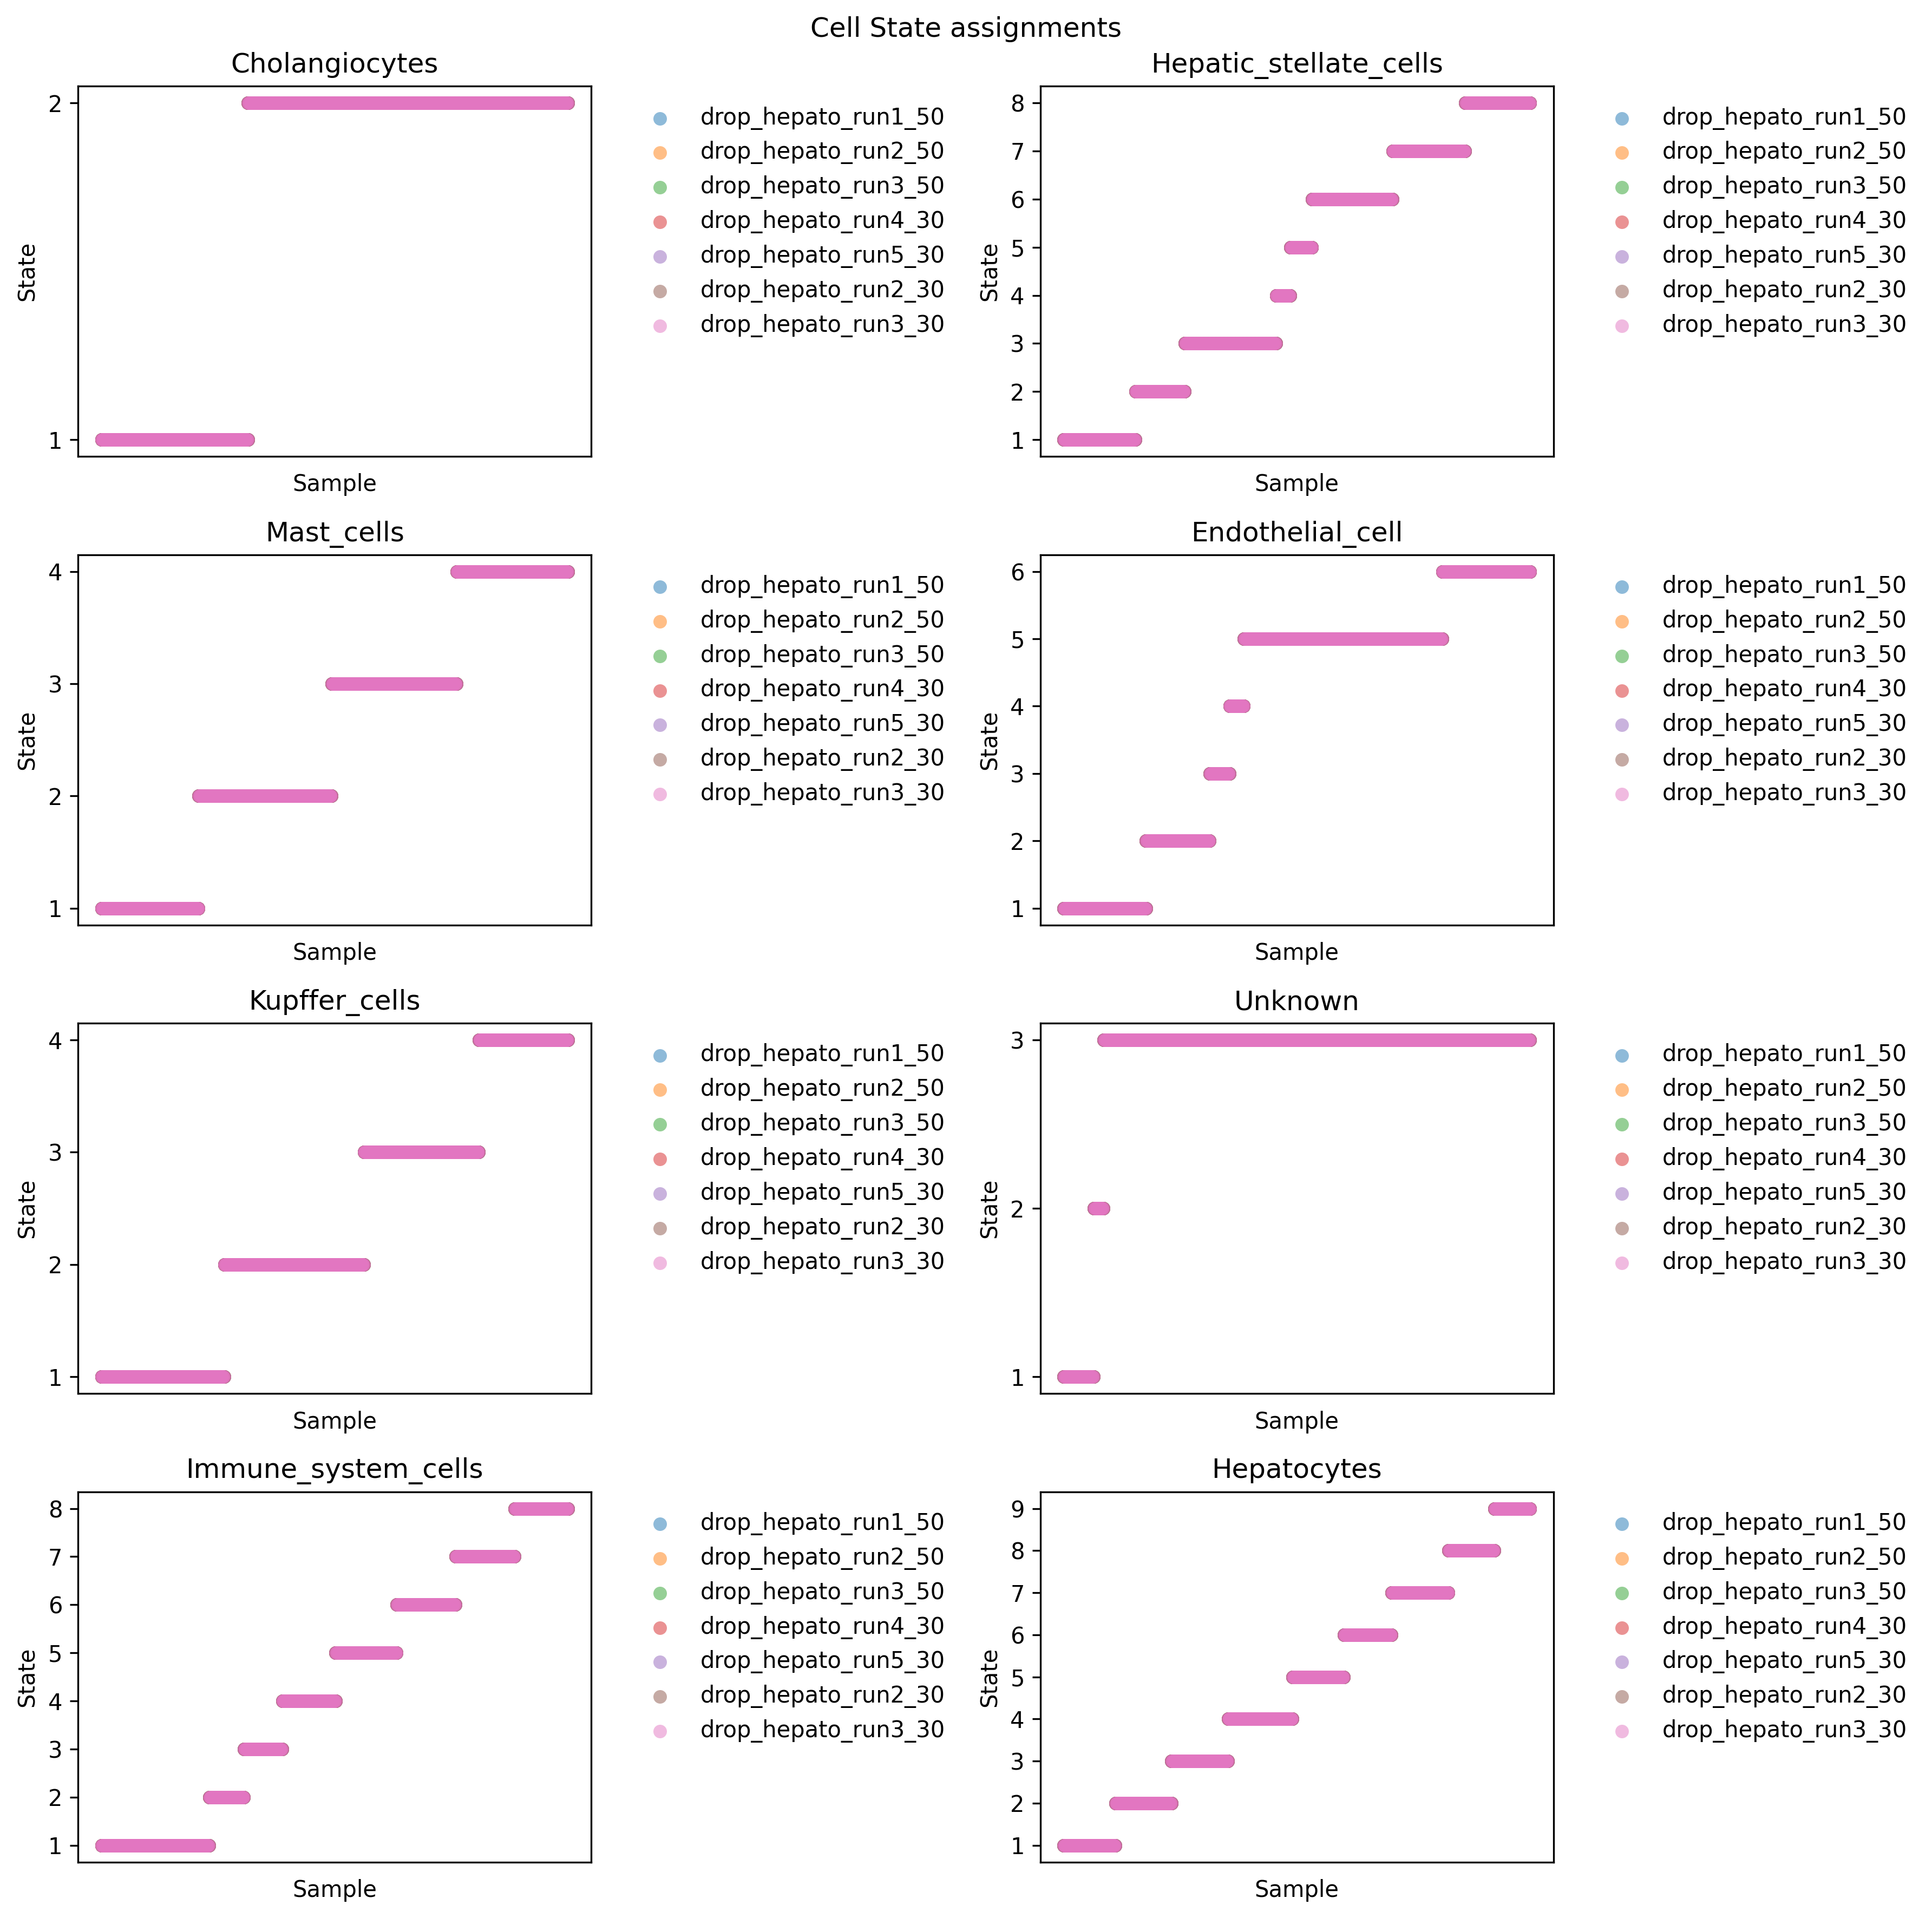

In [11]:
esum.cell_state_scatterplot( states, suptitle = suptitle, figsize = figsize )